In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import joblib
import os
import random

====================================================================================================

**Goal : gather similar companies according to their features and number of trading days**

**Use : provide coherent and meaningful data to model**


**(_Ideal_ : develop tailored model to each type of groups)**



**_See Notebook `Table of content` for good understanding about what this notebook is doing when ran_**

====================================================================================================

# Anaysis of Companies Age from `nasdaq_us_stats.xls`

In [2]:
#!!!Path might not be the same!!!

meta_df = pd.read_csv('../../raw_data/metadata/nasdaq_us_stats.xls')

In [3]:
meta_df.head()

,Unnamed: 0,stock,days,min_close,max_close,start_date,end_date
0,0,AACG.US,3165,0.21703,3.850,2008-01-28,2021-01-25
1,1,AACQ.US,96,9.62000,11.070,2020-09-08,2021-01-25
2,2,AACQU.US,134,10.00000,11.900,2020-07-15,2021-01-25
3,3,AACQW.US,95,1.07500,2.580,2020-09-09,2021-01-25
4,4,AAL.US,1793,9.04000,56.989,2013-12-10,2021-01-25


In [4]:
meta_df.describe()

,Unnamed: 0,days,min_close,max_close
count,3921.000000,3921.000000,3921.000000,3.921000e+03
mean,1960.000000,1876.186942,8.257047,6.181576e+06
std,1132.039531,1795.084440,16.268917,3.863434e+08
min,0.000000,1.000000,0.001000,2.400000e-01
25%,980.000000,312.000000,1.490000,1.438700e+01
50%,1960.000000,1286.000000,5.010000,2.880000e+01
75%,2940.000000,3775.000000,10.384000,6.533000e+01
max,3920.000000,12879.000000,647.290000,2.419200e+10


In [5]:
meta_df = meta_df[['stock', 'days', 'min_close', 'max_close']]

## Company age classification

In [6]:
meta_df['range_price'] = meta_df['max_close'] - meta_df['min_close']
meta_df['years'] = meta_df['days']/365

In [7]:
clean_meta_df = meta_df[['stock', 'years', 'range_price']]

<AxesSubplot:xlabel='years', ylabel='Count'>

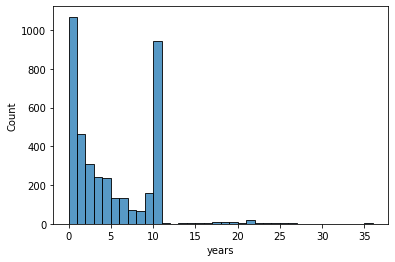

In [8]:
sns.histplot(clean_meta_df['years'], binwidth=1)

👆👆**Anomaly at less than 1 year and 10 year old companies**👆👆

In [9]:
bins = [0, 1, 5, 10, 15, 20, 25, 30, 40]

clean_meta_df['company_vintage'] = pd.cut(meta_df['years'].copy(), 
                                          bins)                            # A company aged of 1Y and one day is
                                          #labels=['(0, 1]','(1, 5]',       # part of the '(1, 5]' class
                                          #        '(5, 10]', '(10, 15]',
                                          #        '(15, 20]', '(20, 25]',
                                          #        '(25, 30]', '(30, 40]'])
print(clean_meta_df['company_vintage'])

0        (5, 10]
1         (0, 1]
2         (0, 1]
3         (0, 1]
4         (1, 5]
5        (5, 10]
6        (5, 10]
7       (10, 15]
8       (25, 30]
9       (10, 15]
10      (10, 15]
11      (10, 15]
12        (0, 1]
13        (0, 1]
14        (1, 5]
15      (10, 15]
16      (10, 15]
17        (0, 1]
18        (0, 1]
19        (1, 5]
20       (5, 10]
21        (0, 1]
22        (0, 1]
23        (0, 1]
24      (10, 15]
25        (0, 1]
26        (0, 1]
27        (0, 1]
28        (1, 5]
29        (0, 1]
          ...   
3891     (5, 10]
3892     (5, 10]
3893      (0, 1]
3894      (0, 1]
3895      (0, 1]
3896      (0, 1]
3897      (0, 1]
3898      (1, 5]
3899    (20, 25]
3900      (1, 5]
3901      (0, 1]
3902      (0, 1]
3903      (0, 1]
3904    (10, 15]
3905    (10, 15]
3906      (1, 5]
3907      (1, 5]
3908      (1, 5]
3909     (5, 10]
3910      (0, 1]
3911      (0, 1]
3912      (0, 1]
3913      (0, 1]
3914      (1, 5]
3915      (1, 5]
3916    (10, 15]
3917     (5, 10]
3918      (1, 

/home/bob/.pyenv/versions/3.7.7/envs/lewagon/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


In [10]:
clean_meta_df['company_vintage'].apply(str)
print(clean_meta_df.info())
clean_meta_df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3921 entries, 0 to 3920
Data columns (total 4 columns):
stock              3921 non-null object
years              3921 non-null float64
range_price        3921 non-null float64
company_vintage    3921 non-null category
dtypes: category(1), float64(2), object(1)
memory usage: 95.9+ KB
None


,stock,years,range_price,company_vintage
0,AACG.US,8.671233,3.63297,"(5, 10]"
1,AACQ.US,0.263014,1.45000,"(0, 1]"
2,AACQU.US,0.367123,1.90000,"(0, 1]"
3,AACQW.US,0.260274,1.50500,"(0, 1]"
4,AAL.US,4.912329,47.94900,"(1, 5]"


## Classification Results

<AxesSubplot:xlabel='years', ylabel='Count'>

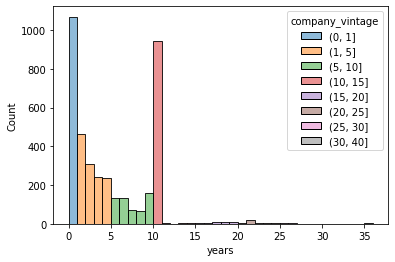

In [11]:
sns.histplot(data=clean_meta_df, x='years', binwidth=1, hue='company_vintage')
#plt.savefig('companies_age_classification.pdf', dpi=1200)

In [12]:
clean_meta_df.groupby('company_vintage')['stock'].count()

company_vintage
(0, 1]      1069
(1, 5]      1252
(5, 10]      564
(10, 15]     950
(15, 20]      32
(20, 25]      37
(25, 30]      13
(30, 40]       4
Name: stock, dtype: int64

### Saving List of Companies Name via `joblib`

In [13]:
stocks_bin_1 = []
stocks_bin_2 = []
stocks_bin_3 = []
stocks_bin_4 = []
stocks_bin_5 = []
stocks_bin_6 = []
stocks_bin_7 = []
stocks_bin_8 = []

for idx, row in clean_meta_df.iterrows():
    x = row['years']                                            # <=> ['days']/365
    st = row['stock'].replace('.US', '')
    
    #print(idx, x, row['stock'])
    if x <= 1 : stocks_bin_1.append(st)
    elif x > 1 and x <= 5: stocks_bin_2.append(st)
    elif x > 5 and x <= 10: stocks_bin_3.append(st)
    elif x > 10 and x <= 15: stocks_bin_4.append(st)        
    elif x > 15 and x <= 20: stocks_bin_5.append(st)        
    elif x > 20 and x <= 25: stocks_bin_6.append(st)        
    elif x > 25 and x <= 30: stocks_bin_7.append(st)        
    elif x > 30: stocks_bin_8.append(st)
    
print(f"Number of companies with less than a year of history: {len(stocks_bin_1)}")
print(f"Number of companies with between a year and 5 years of history: {len(stocks_bin_2)}")    
print(f"Number of companies with between 5 years and 10 years of history: {len(stocks_bin_3)}")
print(f"Number of companies with between 10 years and 15 years of history: {len(stocks_bin_4)}")
print(f"Number of companies with between 15 years and 20 years of history: {len(stocks_bin_5)}")
print(f"Number of companies with between 20 years and 25 years of history: {len(stocks_bin_6)}")
print(f"Number of companies with between 25 years and 30 years of history: {len(stocks_bin_7)}")
print(f"Number of companies with more than 30 years of history: {len(stocks_bin_8)}")

stock_bins = [stocks_bin_1, stocks_bin_2, stocks_bin_3,
              stocks_bin_4, stocks_bin_5, stocks_bin_6,
              stocks_bin_7, stocks_bin_8]

Number of companies with less than a year of history: 1069
Number of companies with between a year and 5 years of history: 1252
Number of companies with between 5 years and 10 years of history: 564
Number of companies with between 10 years and 15 years of history: 950
Number of companies with between 15 years and 20 years of history: 32
Number of companies with between 20 years and 25 years of history: 37
Number of companies with between 25 years and 30 years of history: 13
Number of companies with more than 30 years of history: 4


In [14]:
stock_bins

[['AACQ',
  'AACQU',
  'AACQW',
  'ABCL',
  'ABCM',
  'ABNB',
  'ABST',
  'ACAC',
  'ACACU',
  'ACACW',
  'ACAM',
  'ACAMU',
  'ACAMW',
  'ACCD',
  'ACEV',
  'ACEVU',
  'ACEVW',
  'ACKIU',
  'ACTC',
  'ACTCU',
  'ACTCW',
  'ADERU',
  'ADILW',
  'ADOC',
  'ADOCR',
  'ADOCU',
  'ADOCW',
  'ADTX',
  'ADV',
  'ADVWW',
  'ADXN',
  'AEACU',
  'AEPPZ',
  'AFBI',
  'AFIB',
  'AFINO',
  'AFRM',
  'AGBA',
  'AGBAR',
  'AGBAU',
  'AGBAW',
  'AGC',
  'AGCUU',
  'AGCWW',
  'AGNCO',
  'AGNCP',
  'AHAC',
  'AHACU',
  'AHACW',
  'AIH',
  'AIRTP',
  'AIRTW',
  'AKICU',
  'AKU',
  'AKUS',
  'ALAC',
  'ALACR',
  'ALACU',
  'ALGM',
  'ALGS',
  'ALRS',
  'ALTUU',
  'ALVR',
  'ALXO',
  'AMCIU',
  'AMCIW',
  'AMHC',
  'AMHCU',
  'AMHCW',
  'AMST',
  'AMTI',
  'AMYT',
  'ANDA',
  'ANDAR',
  'ANDAU',
  'ANDAW',
  'ANNX',
  'ANPC',
  'AOUT',
  'API',
  'APRE',
  'APXT',
  'APXTU',
  'APXTW',
  'ARBG',
  'ARBGU',
  'ARBGW',
  'ARKO',
  'ARKOW',
  'ARQT',
  'ARRY',
  'ARTLW',
  'ARYA',
  'ASLE',
  'ASLEW',
  'ASO

❗❗❗**You should check the path you want to save the `stock_bins` list**❗❗❗

(The `metadata` directory is where I saved the `nasdaq_us_stats.xls` csv file of Ian)

In [15]:
joblib.dump(stock_bins, '../../raw_data/metadata/tickers_per_history_lenght__list')

['../../raw_data/metadata/tickers_per_history_lenght__list']

In [16]:
stocks_tickers = joblib.load('../../raw_data/metadata/tickers_per_history_lenght__list')
stocks_tickers

[['AACQ',
  'AACQU',
  'AACQW',
  'ABCL',
  'ABCM',
  'ABNB',
  'ABST',
  'ACAC',
  'ACACU',
  'ACACW',
  'ACAM',
  'ACAMU',
  'ACAMW',
  'ACCD',
  'ACEV',
  'ACEVU',
  'ACEVW',
  'ACKIU',
  'ACTC',
  'ACTCU',
  'ACTCW',
  'ADERU',
  'ADILW',
  'ADOC',
  'ADOCR',
  'ADOCU',
  'ADOCW',
  'ADTX',
  'ADV',
  'ADVWW',
  'ADXN',
  'AEACU',
  'AEPPZ',
  'AFBI',
  'AFIB',
  'AFINO',
  'AFRM',
  'AGBA',
  'AGBAR',
  'AGBAU',
  'AGBAW',
  'AGC',
  'AGCUU',
  'AGCWW',
  'AGNCO',
  'AGNCP',
  'AHAC',
  'AHACU',
  'AHACW',
  'AIH',
  'AIRTP',
  'AIRTW',
  'AKICU',
  'AKU',
  'AKUS',
  'ALAC',
  'ALACR',
  'ALACU',
  'ALGM',
  'ALGS',
  'ALRS',
  'ALTUU',
  'ALVR',
  'ALXO',
  'AMCIU',
  'AMCIW',
  'AMHC',
  'AMHCU',
  'AMHCW',
  'AMST',
  'AMTI',
  'AMYT',
  'ANDA',
  'ANDAR',
  'ANDAU',
  'ANDAW',
  'ANNX',
  'ANPC',
  'AOUT',
  'API',
  'APRE',
  'APXT',
  'APXTU',
  'APXTW',
  'ARBG',
  'ARBGU',
  'ARBGW',
  'ARKO',
  'ARKOW',
  'ARQT',
  'ARRY',
  'ARTLW',
  'ARYA',
  'ASLE',
  'ASLEW',
  'ASO

# Modeling Companies per Vintage - (1, 5]

## Functions definitions & Imports

### `precise_stocks_selector_local()`

In [17]:
from termcolor import colored

def precise_stocks_selector_local(tickers_list=[], path_files='../../raw_data/processed/',
                                  random_sample=False, num_samp = 2, verbose=1):
    """
    Returns a concatened DataFrame of the stocks data which tickers' list were passed
    
    If random_sample = True, return a DataFrame with random sample of stocks from the tickers' list passed
    
    Example:
    INPUT: ['AEP', 'GT', 'INTC', 'PEP']
    OUTPUT: df.tickers.unique() ==> ['GT', 'INTC']
   
    """
    
    if verbose == 2:
        print(colored(tickers_list, 'yellow'))
        
    t = []
    for ticker in tickers_list:
        ticker = f"{ticker}.csv".lower()
        t.append(ticker)
    tickers_list = t
    
    if verbose == 2:
        print(colored(tickers_list, 'yellow'))
        print()
        print()
    
    if verbose >= 1:
        print(colored(f"****** Starting browsing the '{path_files}' directory ******", 'magenta'))
        
    filenames = []
    missing_stock_csv = []

    
    if random_sample:
        for file in os.listdir(path_files):
            if file.endswith('.csv'):
                if file in tickers_list:
                    filenames.append(file)
        
        for ticker in tickers_list:
            #print(ticker)
            #print(missing_stock_csv)
            if ticker not in filenames:
                missing_stock_csv.append(ticker)
                print(colored(f"{ticker} missing", 'red'))
            else:
                pass
        
        #print(missing_stock_csv)
        
        for missed in missing_stock_csv:
            if missed not in tickers_list:
                missing_stock_csv.remove(missed)
        #print(missing_stock_csv)
        
        if len(filenames) < num_samp:
            print(colored('\nSample size bigger that nuber of companies available\n','red'))
        else:
            sample = random.sample(filenames, num_samp)
            
        if verbose >= 1:
            print(colored("\n   *** Complete sampling ***", 'green'))
            
        if verbose == 2:
            print(colored(f"\nfilenames lenght: {len(filenames)}", "yellow"))
        
        if verbose >= 1:
            print(colored(f"\n\n****** Starting stocks DataFrame creation the sample ******", 'magenta'))
        
        dfs = []

        for ticker in sample:
            ticker_df = pd.read_csv('../../raw_data/processed/'+ticker)
            dfs.append(ticker_df)
            if verbose == 2:
                print(colored(f"{ticker} DataFrame created", 'yellow'))
        
        if verbose >= 1:
            print(colored(f"\n\n****** Starting concatenating the sample ******", 'magenta'))
            
            
    else: 
        for file in os.listdir(path_files):
            if (file.endswith('.csv')):
                filenames.append(file)
                #print(f"{file}")
        
        if verbose >= 1:
            print(colored("\n   *** Complete file selection ***", 'green'))
        
        dfs = []
        
        if verbose == 2:
            print(colored(f"\nfilenames lenght: {len(filenames)}", "yellow"))
        
        if verbose >= 1:
            print(colored(f"****** Starting stocks DataFrame creation the sample ******", 'magenta'))
      
        for ticker in tickers_list:
            if ticker in filenames:
                #print(f"{ticker}")
                ticker_df = pd.read_csv('../../raw_data/processed/'+ticker)
                dfs.append(ticker_df)
                if verbose == 2:
                    print(colored(f"{ticker} DataFrame created", 'yellow'))
            else:
                missing_stock_csv.append(ticker)
                print(colored(f"\n{ticker} missing", 'red'))
        
        if verbose >= 1:
            print(colored(f"\n\n****** Starting concatenating the sample ******", 'magenta'))
    
    
    if len(missing_stock_csv) !=0:
        
        print(colored("""\n\n##### Problematic Issue: following stocks not in local database! #####""", "red"))
        print(colored(f"Number of missed stocks: {len(missing_stock_csv)}", "red"))
        print(colored(f"""\n{missing_stock_csv}""", "red"))
    
    return pd.concat(dfs)

### Preprocessing Functions

In [18]:
from sklearn.preprocessing import StandardScaler

def std_scaler(df):
    """
    Scale the data with SKlearn StandardScaler
    """
    
    scaler = StandardScaler()
    
    col_to_scale_df = df.drop(columns=['ticker', 'date', '5TD_return', '10TD_return', '20TD_return'])
    col_to_scale = list(col_to_scale_df)
    
    scaled_df = df
    
    for col in col_to_scale:
        scaled_df[col] = scaler.fit_transform(scaled_df[[col]])
    
    return scaled_df

In [19]:
#Marcin's Function

def build_input_arrays(df, time_window=5, stride=3, input_cols=['RSI', 'Stochastic', 'Stochastic_signal', 'ADI',
       'OBV', 'ATR', 'ADX', 'ADX_pos', 'ADX_neg', 'MACD', 'MACD_diff',
       'MACD_signal'] , target_col='5TD_return'):
    output_array = []
    target_array = []
    df_sorted = df.sort_values('date', ascending=False)
    df_sorted.reset_index(drop=True, inplace=True)
    for row in range(0, len(df), stride):
        df_slice = df_sorted.iloc[row: row + time_window]
        if df_slice.shape[0]==time_window:
            output_array.append(np.array(df_slice[input_cols].values))
            target_array.append(df_slice[target_col].iloc[0])
    return np.array(output_array), np.array(target_array)

In [20]:
#Ian's Function

def train_test_split(df, test_set_size='3Y'):
    """
    Split the preprocessed stock data file into a train and test dataset
    INPUT: the dataframe to be split, and size of the test set in months or years ('3M' or '2Y')
    OUTPUT: returns a train_set and test_set dataframe, index is set to the date
    
    EXAMPLE: train_set, test_set = train_test_split(input_df, '3Y')
    """
    if not np.issubdtype(df['date'].dtype, np.datetime64):
        df['date'] = pd.to_datetime(df['date'], format=('%Y-%m-%d'))
    test_set = df.sort_values(by="date",ascending=True).set_index("date").last(test_set_size)
    train_set = df.drop(df.tail(len(test_set)).index).set_index("date")
    test_set.reset_index(inplace=True)
    train_set.reset_index(inplace=True)
    return train_set, test_set

In [21]:
def thresholds_encoding(df, r5d=0.0006, same_thresholds=True, r10d=0.0012, r20d=0.0024):
    """
    Binary encode the 5, 10 and 20 days return columns according to the thresholds
    
    INPUT: dataframe with '5TD_return', '10TD_return' and '20TD_return' columns
    OUTPUT: dataframe with binary encoded aforementionned columns
    
    If the thresolds returns are the same on a yearly basis for the different period use:
                r10d = r5d * 2 
            and
                r20d = r10d * 2
            keep same_thresholds=True
        Otherwise, define manually r10d and r20d
    """
    wk_df = df.copy()
    
    if same_thresholds:
        r10d = r5d * 2
        r20d = r10d * 2
    
    wk_df['5TD_return'] = wk_df['5TD_return'].apply(lambda x: 1 if x > r5d else 0)
    wk_df['10TD_return'] = wk_df['10TD_return'].apply(lambda x: 1 if x > r10d else 0)
    wk_df['20TD_return'] = wk_df['20TD_return'].apply(lambda x: 1 if x > r20d else 0)
    
    return wk_df

### Visualisation Functions

In [22]:
def plot_loss_accuracy(history):
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('Model loss')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Validation'], loc='best')
    plt.show()
    
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.title('Model Accuracy')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Validation'], loc='best')
    plt.show()

### Model Saving Functions

In [23]:
def runs_history_loading(name='charles', vintage='1_5', path_files='models_histories'):
    
    filenames = []
    
    run_history = f"{name}_companies_{vintage}_model_history"
    
    for file in os.listdir(path_files):
        filenames.append(file)
    
    if run_history in filenames:
        print("Previous models scores:\n",joblib.load(path_files+'/'+run_history))
        return joblib.load(path_files+'/'+run_history)
    
    else:
        print("No previous models scores found\nReturning uncomplete list: [('tickers', ['loss', 'precision', 'accuracy'])]")
        return [('tickers', ['loss', 'precision', 'accuracy'])]

In [24]:
def runs_history_saving(score_file, vintage='1_5', author='charles', path_files='models_histories'):
    filenames = []
    
    run_history = f"{author}_companies_{vintage}_model_history"
    
    for file in os.listdir(path_files):
        filenames.append(file)
    
    if f"{author}_old_cie_model_history" in filenames:
        print("Previous models scores found:\n", joblib.load(path_files+'/'+run_history))
        confirmation = input(prompt="""You are about to save over the previous history, which will replace it by your new history.
        Are you sure you want to do that? (Y/n)""")
        
        if confirmation =='Y':
            joblib.dump(path_files+'/'+run_history)
            print("History Saving Complete!")
            print(f"File saved as: {author}_companies_{vintage}_model_history")
            print(f"File location:{path_files}")            
            
        else:
            print("History Saving Aborted!")
    
    else:
        joblib.dump(score_file, path_files+'/'+run_history)
        print("History Saving Complete!")
        print(f"File saved as: {author}_companies_{vintage}_model_history")
        print(f"File location:{path_files}")

## Preprocessing

### Importing the (1,5] Companies Sample

In [25]:
companies_1_5 = stocks_tickers[1]
companies_1_5

['AAL',
 'ABEO',
 'ABTX',
 'ACBI',
 'ACET',
 'ACGLO',
 'ACGLP',
 'ACIA',
 'ACIU',
 'ACMR',
 'ACRS',
 'ADAP',
 'ADES',
 'ADIL',
 'ADMA',
 'ADMS',
 'ADPT',
 'ADVM',
 'AEMD',
 'AEPPL',
 'AERI',
 'AESE',
 'AEYE',
 'AFIN',
 'AFINP',
 'AFMD',
 'AFYA',
 'AGFS',
 'AGLE',
 'AGMH',
 'AGNCM',
 'AGNCN',
 'AGRX',
 'AGTC',
 'AHCO',
 'AIHS',
 'AIQ',
 'AIRG',
 'AKBA',
 'AKER',
 'AKRO',
 'AKTS',
 'AKTX',
 'ALACW',
 'ALDX',
 'ALEC',
 'ALJJ',
 'ALLK',
 'ALLO',
 'ALNA',
 'ALPN',
 'ALRM',
 'ALRN',
 'ALTA',
 'ALTM',
 'ALTR',
 'ALTY',
 'ALYA',
 'AMAL',
 'AMCA',
 'AMCI',
 'AMEH',
 'AMPH',
 'AMRHW',
 'AMRK',
 'AMTB',
 'AMTBB',
 'ANAB',
 'ANCN',
 'ANY',
 'APHA',
 'APLS',
 'APLT',
 'APM',
 'APOP',
 'APOPW',
 'APPF',
 'APPN',
 'APTX',
 'APVO',
 'AQB',
 'AQMS',
 'AQST',
 'ARAV',
 'ARCE',
 'ARDS',
 'ARDX',
 'AREC',
 'ARGX',
 'ARPO',
 'ARTL',
 'ARVN',
 'ASET',
 'ASLN',
 'ASND',
 'ASPU',
 'ASRVP',
 'ATCX',
 'ATEX',
 'ATIF',
 'ATNFW',
 'ATNX',
 'ATOM',
 'ATRA',
 'ATXI',
 'AUPH',
 'AUTL',
 'AVCO',
 'AVCT',
 'AVGR',
 'A

In [26]:
stocks_1_5_df = precise_stocks_selector_local(tickers_list=companies_1_5, random_sample=True, num_samp = 4, verbose=1)

****** Starting browsing the '../../raw_data/processed/' directory ******
abtx.csv missing
acet.csv missing
aciu.csv missing
acrs.csv missing
ades.csv missing
adms.csv missing
adpt.csv missing
agfs.csv missing
agrx.csv missing
aihs.csv missing
akts.csv missing
aktx.csv missing
aldx.csv missing
apls.csv missing
aplt.csv missing
aptx.csv missing
aqms.csv missing
aqst.csv missing
ards.csv missing
ardx.csv missing
argx.csv missing
aset.csv missing
aspu.csv missing
atcx.csv missing
atex.csv missing
atnx.csv missing
avct.csv missing
axnx.csv missing
aytu.csv missing
azrx.csv missing
banx.csv missing
bfit.csv missing
bfst.csv missing
bhat.csv missing
blfs.csv missing
bpyu.csv missing
cbtx.csv missing
cdlx.csv missing
cdtx.csv missing
cetx.csv missing
cfms.csv missing
cfrx.csv missing
chngu.csv missing
chrs.csv missing
chx.csv missing
ckpt.csv missing
clls.csv missing
clou.csv missing
clps.csv missing
clpt.csv missing
clxt.csv missing
cmls.csv missing
cndt.csv missing
cnst.csv missing
codx.csv

### Companies (randomly) selected

In [27]:
stocks_1_5_df.ticker.unique()

array(['OXSQL', 'DTEA', 'NEWA', 'MYFW'], dtype=object)

### Setting date to `datetime` type

In [28]:
stocks_1_5_df['date'] = pd.to_datetime(stocks_1_5_df['date'])

### Standard Scaling

In [29]:
scaled_stocks_1_5_df = std_scaler(stocks_1_5_df)

/home/bob/.pyenv/versions/3.7.7/envs/lewagon/lib/python3.7/site-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/home/bob/.pyenv/versions/3.7.7/envs/lewagon/lib/python3.7/site-packages/sklearn/base.py:464: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


### Encoding the Returns

In [30]:
clean_stocks_1_5_df = thresholds_encoding(scaled_stocks_1_5_df)

### Getting `X_train`, `y_train`, `X_test`, `y_test`

In [31]:
train, test = train_test_split(clean_stocks_1_5_df, '1Y')

In [32]:
train.shape

(569, 17)

In [33]:
test.shape

(949, 17)

In [34]:
X_train, y_train = build_input_arrays(train)
X_test, y_test = build_input_arrays(test)

In [35]:
X_train.shape

(189, 5, 12)

In [36]:
X_test.shape

(315, 5, 12)

## Model Initialisation

In [37]:
from tensorflow.keras import Sequential
from tensorflow.keras import layers, models 
from tensorflow.keras.optimizers import RMSprop, Adam
from tensorflow.keras import regularizers
from tensorflow.keras.metrics import Precision

precision = Precision()


optim = RMSprop(learning_rate=0.0001)

def init_model(X_train):
    model = Sequential()
    reg_l1 = regularizers.l1(0.001)
    reg_l2 = regularizers.l2(0.001)
    reg_l1_l2 = regularizers.l1_l2(l1=0.001, l2=0.0001)
    
    model.add(layers.LSTM(200, return_sequences=True, input_shape=X_train.shape[1:], activation='tanh'))
    model.add(layers.LSTM(200, activation='tanh'))
    model.add(layers.Dropout(0.3))
    model.add(layers.Dense(200, activation='relu', kernel_regularizer=reg_l1))
    model.add(layers.Dropout(0.3))
    model.add(layers.Dense(100, activation='relu', bias_regularizer=reg_l2))
    model.add(layers.Dropout(0.3))
    model.add(layers.Dense(50, activation='relu', activity_regularizer=reg_l1_l2))
    #model.add(layers.Dropout(0.3))
    #model.add(layers.Dense(25, activation='relu'))
    model.add(layers.Dense(1, activation='sigmoid'))

    model.compile(loss='binary_crossentropy', optimizer=optim, metrics=[precision, 'accuracy'])
    
    return model

In [62]:
model = init_model(X_train)

from tensorflow.keras.callbacks import EarlyStopping

es = EarlyStopping(patience=10, restore_best_weights=True)

model.fit(X_train, y_train, 
          epochs=500, 
          batch_size=8,
          validation_split=0.2,
          callbacks=[es]
         )

Epoch 1/500
19/19 [==============================] - 1s 78ms/step - loss: 3.0968 - precision: 0.4435 - accuracy: 0.4768 - val_loss: 3.0500 - val_precision: 0.0000e+00 - val_accuracy: 0.6053
Epoch 2/500
19/19 [==============================] - 1s 31ms/step - loss: 3.0234 - precision: 0.4750 - accuracy: 0.4967 - val_loss: 2.9863 - val_precision: 0.0000e+00 - val_accuracy: 0.6053
Epoch 3/500
19/19 [==============================] - 1s 31ms/step - loss: 2.9595 - precision: 0.5385 - accuracy: 0.5298 - val_loss: 2.9226 - val_precision: 0.0000e+00 - val_accuracy: 0.6053
Epoch 4/500
19/19 [==============================] - 1s 30ms/step - loss: 2.8977 - precision: 0.4510 - accuracy: 0.4768 - val_loss: 2.8609 - val_precision: 0.0000e+00 - val_accuracy: 0.6053
Epoch 5/500
19/19 [==============================] - 1s 29ms/step - loss: 2.8372 - precision: 0.4800 - accuracy: 0.5033 - val_loss: 2.8004 - val_precision: 0.0000e+00 - val_accuracy: 0.6053
Epoch 6/500
19/19 [==============================]

Epoch 45/500
19/19 [==============================] - 1s 27ms/step - loss: 1.2338 - precision: 0.5728 - accuracy: 0.6093 - val_loss: 1.2966 - val_precision: 0.5714 - val_accuracy: 0.6316
Epoch 46/500
19/19 [==============================] - 1s 27ms/step - loss: 1.2264 - precision: 0.5588 - accuracy: 0.5894 - val_loss: 1.2807 - val_precision: 0.8000 - val_accuracy: 0.6842
Epoch 47/500
19/19 [==============================] - 1s 27ms/step - loss: 1.1985 - precision: 0.5612 - accuracy: 0.5894 - val_loss: 1.2708 - val_precision: 0.6250 - val_accuracy: 0.6579
Epoch 48/500
19/19 [==============================] - 1s 28ms/step - loss: 1.1859 - precision: 0.5534 - accuracy: 0.5828 - val_loss: 1.2615 - val_precision: 0.5000 - val_accuracy: 0.6053
Epoch 49/500
19/19 [==============================] - 1s 27ms/step - loss: 1.1686 - precision: 0.5743 - accuracy: 0.6093 - val_loss: 1.2505 - val_precision: 0.5000 - val_accuracy: 0.6053
Epoch 50/500
19/19 [==============================] - 1s 27ms/ste

19/19 [==============================] - 1s 29ms/step - loss: 0.8112 - precision: 0.7213 - accuracy: 0.6887 - val_loss: 1.0533 - val_precision: 0.0000e+00 - val_accuracy: 0.6053
Epoch 89/500
19/19 [==============================] - 1s 30ms/step - loss: 0.7947 - precision: 0.7258 - accuracy: 0.6954 - val_loss: 1.0600 - val_precision: 0.0000e+00 - val_accuracy: 0.6053
Epoch 90/500
19/19 [==============================] - 1s 27ms/step - loss: 0.7894 - precision: 0.7778 - accuracy: 0.7086 - val_loss: 1.0539 - val_precision: 0.0000e+00 - val_accuracy: 0.6053
Epoch 91/500
19/19 [==============================] - 1s 29ms/step - loss: 0.7960 - precision: 0.7500 - accuracy: 0.6954 - val_loss: 1.0519 - val_precision: 0.3333 - val_accuracy: 0.5789
Epoch 92/500
19/19 [==============================] - 1s 29ms/step - loss: 0.7962 - precision: 0.7119 - accuracy: 0.6755 - val_loss: 1.0517 - val_precision: 0.0000e+00 - val_accuracy: 0.6053
Epoch 93/500
19/19 [==============================] - 1s 28ms/

### Model Evalutation

In [63]:
y_pred = model.predict(X_test)

In [64]:
y_pred.shape

(315, 1)

In [65]:
y_test.sum()/len(y_test)

0.5238095238095238

In [66]:
model.evaluate(X_test, y_test)

10/10 [==============================] - 0s 12ms/step - loss: 0.8638 - precision: 0.5641 - accuracy: 0.5079


[0.863798201084137, 0.5641025900840759, 0.5079365372657776]

### Model Score Saving

In [43]:
model_runs_history = runs_history_loading()

Previous models scores:
 [('tickers', ['loss', 'precision', 'accuracy']), (['TIGR', 'JRVR', 'RILYO', 'SURF'], [0.9655821919441223, 0.5929203629493713, 0.5787878632545471]), (['NKLA', 'FTXO', 'PBCTP', 'GTYH'], [2.1066877841949463, 0.5315315127372742, 0.5106382966041565]), (['LBRDK', 'ACMR', 'CLRBZ', 'DMAC'], [1.1432931423187256, 0.5256410241127014, 0.4792332351207733])]


In [44]:
model_runs_history

[('tickers', ['loss', 'precision', 'accuracy']),
 (['TIGR', 'JRVR', 'RILYO', 'SURF'],
  [0.9655821919441223, 0.5929203629493713, 0.5787878632545471]),
 (['NKLA', 'FTXO', 'PBCTP', 'GTYH'],
  [2.1066877841949463, 0.5315315127372742, 0.5106382966041565]),
 (['LBRDK', 'ACMR', 'CLRBZ', 'DMAC'],
  [1.1432931423187256, 0.5256410241127014, 0.4792332351207733])]

In [45]:
model_runs_history.append((list(stocks_1_5_df.ticker.unique()),model.evaluate(X_test, y_test)))

10/10 [==============================] - 0s 38ms/step - loss: 0.9527 - precision: 0.5243 - accuracy: 0.4921


In [46]:
runs_history_saving(model_runs_history)

History Saving Complete!
File saved as: charles_companies_1_5_model_history
File location:models_histories
